<a id = 'top'></a>
- [PROJECT AIM AND DATA](#aim)
- [PCA USING PYTHON](#python)
- [PCA USING SKLEARN](#sklearn)
- [CONCLUSION'S](#conclusion)
-------------------------------------------------------------[BACK TO TOP](#top)

In [2]:
# importing libraries some of them may not be used in this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn
import time
import math
import random
import os

<a id = 'aim'></a>
### PROJECT AIM AND DATA
#### AIM :- reduce the no of features in each data point with out losing information
- we will be using principle component analysis to do this
- Generally dimentionality reduction is done so that
  1. amount of space required reduces
  2. enabling the data to be visualised (we can only visualise 1d,2d,3d data)
#### DATA
- for this project we will generate random data 
- we will be generating a np array of shape m x n as our sample dataset
-------------------------------------------------------------[BACK TO TOP](#top)

In [4]:
m = 2000  # no of examples
n = 10    # no of features of each example
data = np.random.rand(2000,10)*100
# we cannot visualise this data directly

<a id = ''></a>
### PCA USING PYTHON
-------------------------------------------------------------[BACK TO TOP](#top)

the amount of information variance retained in %  80.25508531739787


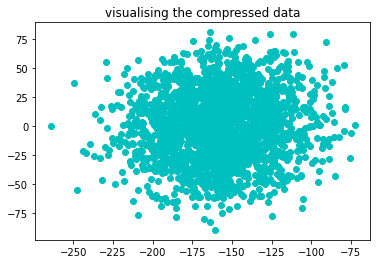

In [19]:
# pca using python
def pca(x,k):
    m = x.shape[0]
    sigma = np.matmul(x.T,x)
    u , s ,v = np.linalg.svd(sigma)
    ured = u[:,:k]
    z = np.matmul(x , ured)         # reduced dataset
    xdash = np.matmul(z,ured.T)     # recovered dataset
    error = np.sum((x-xdash)**2)/m
    var = np.sum(x**2)/m            # variance of input dataset 
    val1 = error/var                    # amount of info retained 
    val2 = 1- np.sum(s[:k]) / np.sum(s) # amount of info retained
    return (z,xdash,val1,val2)
z,xdash,val1,val2 = pca(data,2)
plt.scatter(z[:,0],z[:,1],c='c',cmap='rainbow')
plt.title('visualising the compressed data')
print('the amount of information variance retained in % ',(1-val2)*100)

<a id = ''></a>
### USING SKLEARN
-------------------------------------------------------------[BACK TO TOP](#top)

the information retained in %  77.58622028805738


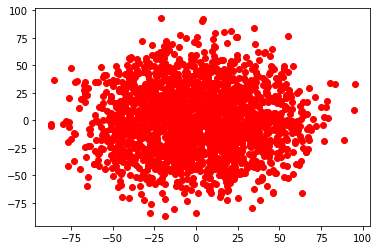

In [20]:
from sklearn.decomposition import PCA
pobject = PCA(n_components=2) # no of reduced dimensions = 2
pobject.fit(data)             #
pred = pobject.transform(data)
print('the information retained in % ',(1-(pobject.explained_variance_ratio_).sum())*100)
plt.scatter(pred[:,0],pred[:,1],c='r')

<a id = 'top'></a>
### CONCLUSIONS
- let us now compare both the algorithms outputs 
  and verify how good both are performing 
  1. python impolementation  : retained variance of 80 %
  2. sklearn implementation  : retained variance of 77 %
- generally the no of principle compenets are selected such that variance retained in above
  99 % , since in this project our aim is to visualise higher dimensional data such figures
  are good
-------------------------------------------------------------[BACK TO TOP](#top)